# RNN

In [27]:
def data_prep(path_csv, path, height, width, time_steps = 0, model = None, rnn = False, rnn1 = False, path_model = ""):
    vid = pd.read_csv(path_csv, delimiter=';')
    data = []
    labels = []
    test = 0
    for i in range(len(vid["Filename"])):
        file = vid["Filename"][i]
        sign = vid["Annotation tag"][i]
        image = Image.open(path + file)
        image = image.resize((width, height))
        image = np.asarray(image)
        data.append(image)
        labels.append(sign)
    signs = np.array(data)
    labels = np.array(labels)
    signs = signs.astype('float64')
    key = pd.read_csv("App/lib/datasets/key2.csv")
    key = key.groupby("Label")
    encodings = []
    for i in labels:
        ind = key.get_group(i)["Encoding"]
        tmp = np.zeros(47)
        tmp[ind] = 1
        encodings.append(list(tmp))



    signs -= np.mean(signs)

    if rnn:
        pred = model.predict(signs)
        total = len(pred)
        while total % time_steps != 0:
            total -= 1
        loops = total / time_steps
        X = []
        tmp = []
        y = []
        for i in range(total):
            tmp.append(pred[i])
            if (i + 1) % time_steps == 0:
                X.append(tmp)
                y.append(encodings[i])
                tmp = []
        return signs, labels, np.array(X), np.array(y)

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
from lib.prep import data_prep

In [2]:
height = 227
width = 227
time_steps = 5

In [3]:
model = tf.keras.models.load_model("App/lib/Models/AlexNet_test")

In [10]:
def prep_rnn(path_csv, path, height, width,model, time_steps, train, split):
    vid = pd.read_csv(path_csv, delimiter=';')
    data = []
    labels = []
    test = 0
    for i in range(len(vid["Filename"])):
        file = vid["Filename"][i]
        sign = vid["Annotation tag"][i]
        image = Image.open(path + file)
        image = image.resize((width, height))
        image = np.asarray(image)
        data.append(image)
        labels.append(sign)
    print("test1")
    signs = np.array(data)
    labels = np.array(labels)
    signs = signs.astype('float64')
    
    signs1 = signs[:int(len(signs)*.5)]
    signs2 = signs[int(len(signs)*.5):]
    key = pd.read_csv("App/lib/datasets/key2.csv")
    key = key.groupby("Label")
    encodings = []
    for i in labels:
        ind = key.get_group(i)["Encoding"]
        tmp = np.zeros(47)
        tmp[ind] = 1
        encodings.append(list(tmp))

    signs1 -= np.mean(signs)
    signs2 -= np.mean(signs)
    print("test2")

    pred1 = model.predict(signs1)
    pred2 = model.predict(signs2)
    pred = np.concatenate((pred1,pred2),axis=0)
    print("test3")
    #len pred len signs
    pad = np.zeros(47)
    groups = []
    back = ""
    count = 0
    for i in labels:
        if i != back:
            count += 1
        groups.append(count)
        back = i
    print(np.max(groups))
    maxv = count
    curr = 1
    X = []
    y = []
    while curr <= count:
        tmp = []
        size = groups.count(curr)
        if size < time_steps and size != 1:
            zeros = time_steps - size
            ind = groups.index(curr)
            for i in range(zeros):
                tmp.append(pad)
            for i in range(ind, ind + size):
                tmp.append(pred[i])
        elif size > time_steps:
            red = size - time_steps
            ind = groups.index(curr)
            for i in range(ind + red, ind + red + time_steps):
                tmp.append(pred[i])
        elif size!=1:
            ind = groups.index(curr)
            for i in range(ind, ind + time_steps):
                tmp.append(pred[i])
        if size != 1:
            X.append(tmp)
            y.append(encodings[groups.index(curr)])
        curr += 1
    return np.array(X), np.array(y)

In [28]:
#C:\Notebooks\DL\AlphaSign\lib\datasets\LISA\vid2\frameAnnotations-vid_cmp2.avi_annotations
path_csv = "lib/datasets/LISA/allAnnotations.csv"
path = "lib/datasets/LISA/"
_, _, X, y = data_prep(path_csv, path, height, width, model = model, time_steps = time_steps, rnn= True)

In [29]:
X.shape, y.shape

((1571, 5, 47), (1571, 47))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [31]:
X_train.shape, X_val.shape

((1178, 5, 47), (393, 5, 47))

In [32]:
X_train.shape, X_val.shape

((1178, 5, 47), (393, 5, 47))

## RNN

In [76]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Flatten, Dropout, GRU

experiment = {
             'architecture': 'video_lrcnn_frozen',
             'dropout': 0.2,
             'layer_1_size': 256,
             'layer_2_size': 512,
             'layer_3_size': 256,
             'model_id': 1,
             'pooling': 'max',
             'pretrained_model_name': 'resnet50',
             'sequence_length': 20,
             'sequence_model': "LSTM",
             'sequence_model_layers': 2}
             ret1 and 2 = true
             
rnn = Sequential()
rnn.add(LSTM(256,input_shape=(5, 48), dropout= 0.2, return_sequences= True))
rnn.add(LSTM(512, return_sequences= True, dropout= 0.2))
rnn.add(Flatten())
rnn.add(Dense(256, activation='relu'))
rnn.add(Dropout(0.2)
try:
    rnn.add(Flatten())
except:
    pass
rnn.add(Dropout(0.2)
rnn.add(Dense(48, activation='softmax'))


rnn = Sequential()
rnn.add(LSTM(256,input_shape=(5, 48), dropout= 0.2))
rnn.add(LSTM(512, dropout= 0.2))
rnn.add(LSTM(256, return_sequences= True, dropout= 0.2))
new 256 512 256 val_accuracy: .8649 or .9054
new valacc = .8908


rnn.add(LSTM(256,input_shape=(5, 48), dropout= 0.2))
rnn.add(Dense(1024, activation='relu'))
rnn.add(Dropout(0.5))
rnn.add(Dense(1024, activation='relu'))
rnn.add(Dropout(0.5))
rnn.add(Dense(48, activation='softmax'))
rnn.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001, decay = 1e-6, momentum=0.9, nesterov = True)
            , loss="categorical_crossentropy", metrics=["accuracy"])

## LSTM

In [67]:
#256 D1024 d0.5 D1024 d0.5 sgd
rnn = Sequential()
rnn.add(LSTM(256,input_shape=(5, 47), dropout= 0.2, return_sequences= True))
rnn.add(LSTM(512, return_sequences= True, dropout= 0.2))
rnn.add(LSTM(256, dropout= 0.2))
rnn.add(Flatten())
rnn.add(Dense(1024, activation='relu'))
rnn.add(Dropout(0.2))
rnn.add(Dense(1024, activation='relu'))
rnn.add(Dropout(0.2))
rnn.add(Dense(47, activation='softmax'))
rnn.compile(optimizer="adam" , loss="categorical_crossentropy", metrics=["accuracy"])



history = rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val)) #, validation_data=(X_val, y_val)

Epoch 1/50
37/37 [==============================] - 4s 32ms/step - loss: 2.5729 - accuracy: 0.4160 - val_loss: 1.6766 - val_accuracy: 0.5573
Epoch 2/50
37/37 [==============================] - 0s 12ms/step - loss: 1.8382 - accuracy: 0.5688 - val_loss: 1.4718 - val_accuracy: 0.6260
Epoch 3/50
37/37 [==============================] - 0s 13ms/step - loss: 1.5333 - accuracy: 0.6460 - val_loss: 1.3839 - val_accuracy: 0.6692
Epoch 4/50
37/37 [==============================] - 0s 13ms/step - loss: 1.3525 - accuracy: 0.6698 - val_loss: 1.2032 - val_accuracy: 0.7023
Epoch 5/50
37/37 [==============================] - 0s 13ms/step - loss: 1.1711 - accuracy: 0.7165 - val_loss: 1.1455 - val_accuracy: 0.7226
Epoch 6/50
37/37 [==============================] - 0s 13ms/step - loss: 1.0851 - accuracy: 0.7343 - val_loss: 1.1624 - val_accuracy: 0.7405
Epoch 7/50
37/37 [==============================] - 1s 14ms/step - loss: 1.0348 - accuracy: 0.7428 - val_loss: 1.0885 - val_accuracy: 0.7455
Epoch 8/50
37

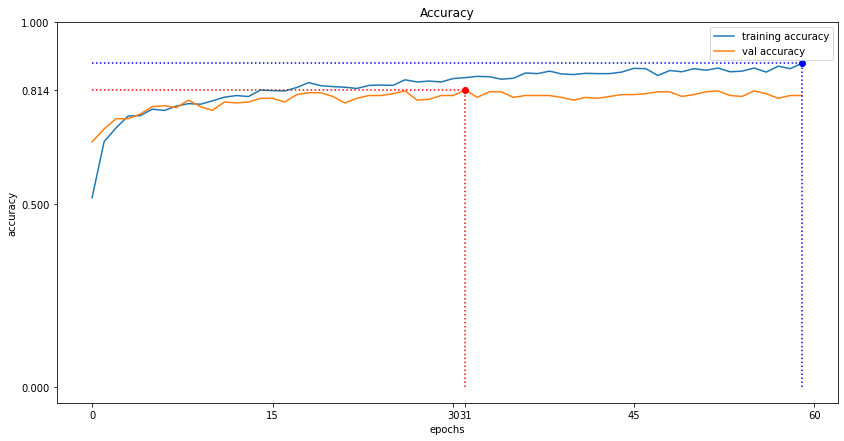

In [44]:
# new
# 356 512 F D256 d0.2 F d0.2 e27 b8

plot(history)

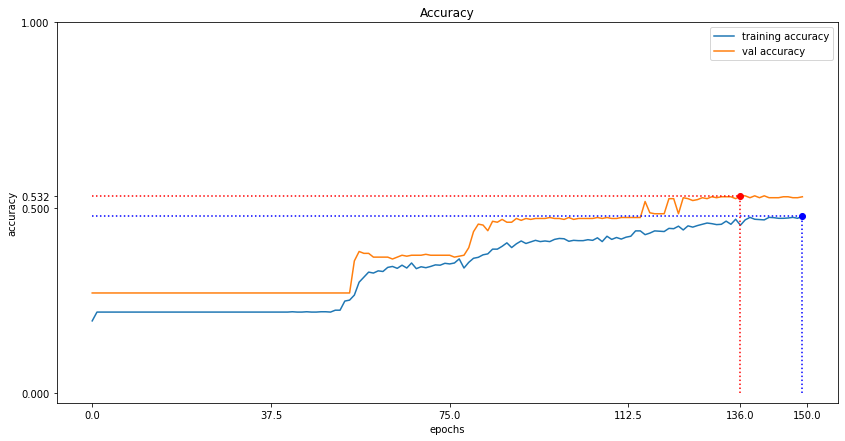

In [61]:
#new
#256 D1024 d0.5 D1024 d0.5 sgd
plot(history)

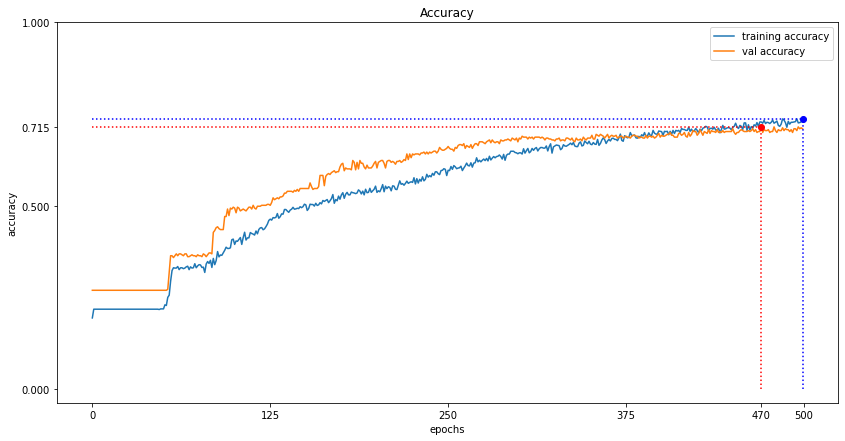

In [63]:
#new
#256 D1024 d0.2 D1024 d0.2 sgd
plot(history)

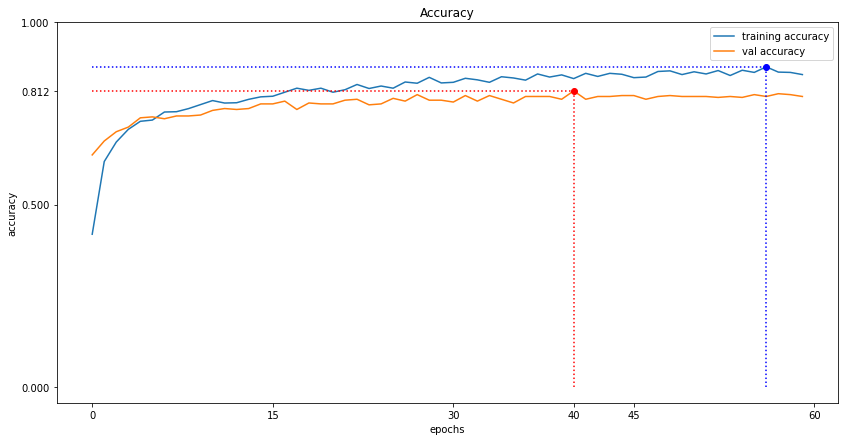

In [46]:
# new
# 356 512 F D256 d0.2 F d0.2 e27 b32

plot(history)

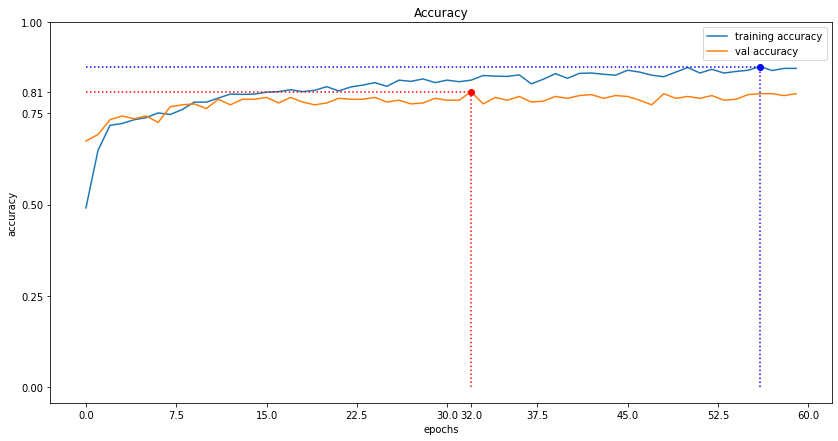

In [41]:
# new
# 356 512 F D256 d0.2 F d0.2 e27 b16

plot(history)

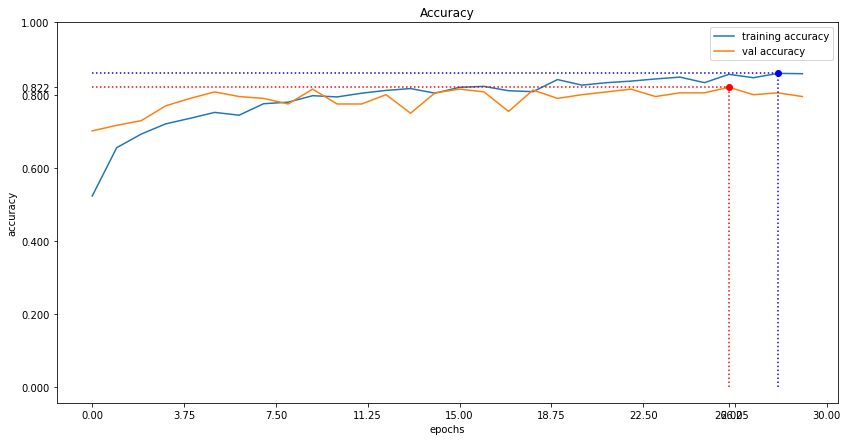

In [35]:
# new
# 356 512 F D256 d0.2 F d0.2 e27 b1

plot(history)

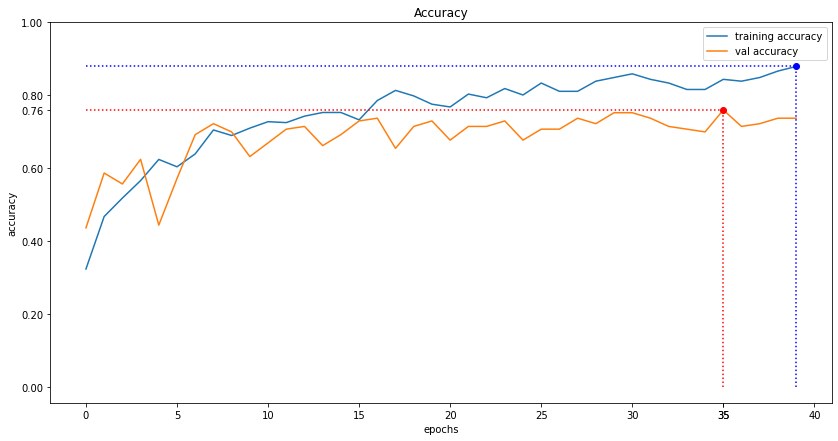

In [38]:
#7
#256 512 256 d0.2 F
plot(history)

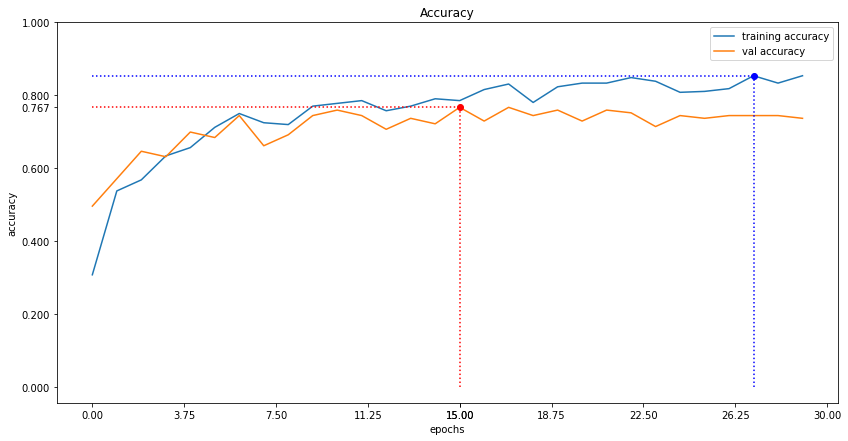

In [32]:
#7
#256 512 F D256 d0.2 F? d0.2
plot(history)

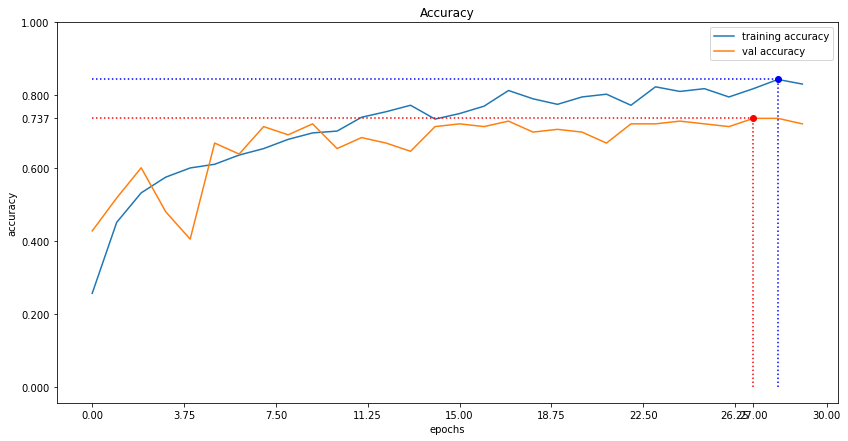

In [34]:
#7
#256 512 256 F d0.2
plot(history)

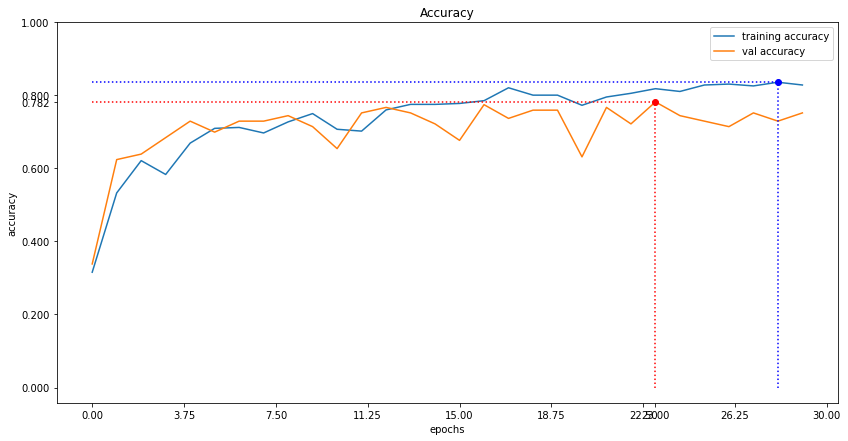

In [21]:
#256 512 F D256 d0.2 F? d0.2
plot(history)

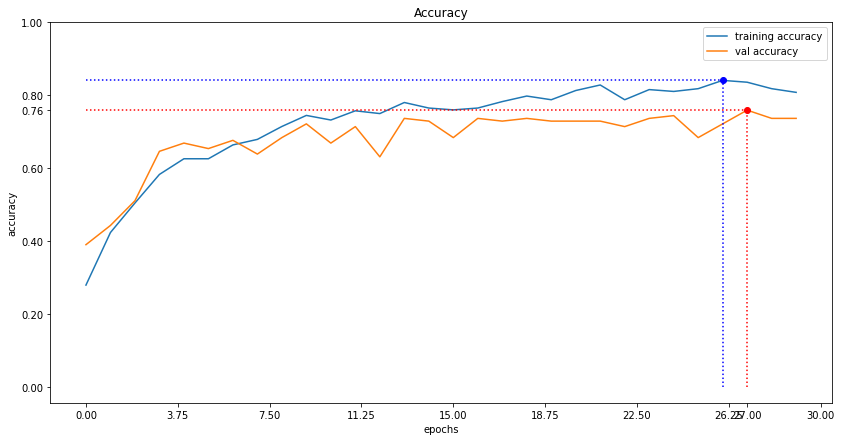

In [15]:
#256 512 256 d0.5 adam
plot(history)

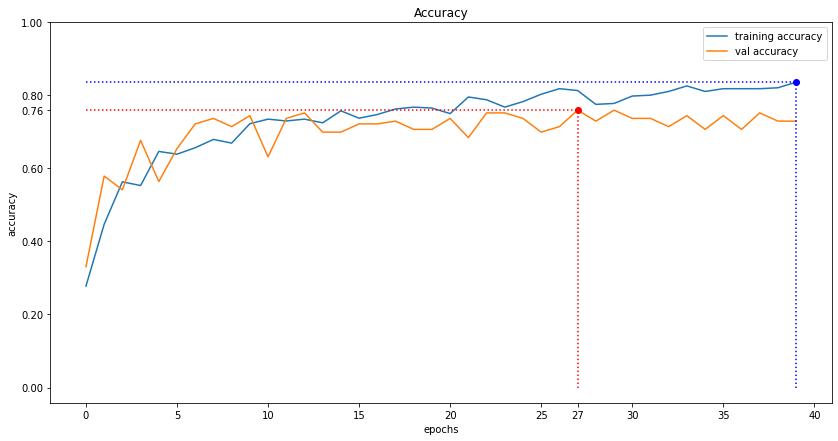

In [92]:
#256 512 256 d0.5 adam
plot(history)

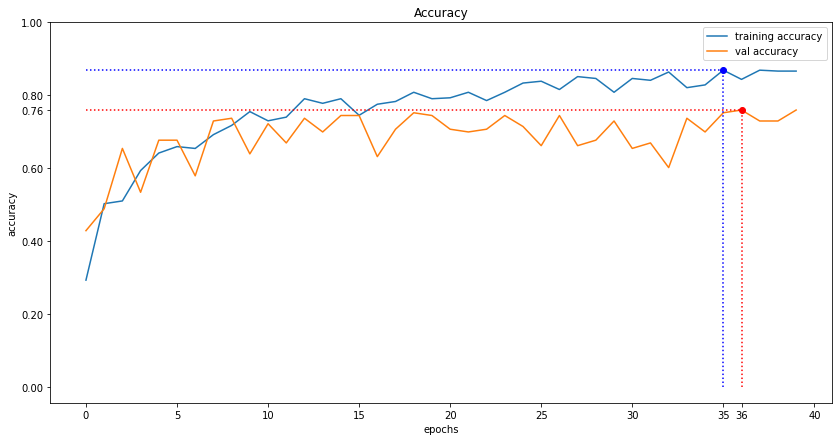

In [96]:
#256 512 256 F d0.2 ret seq
plot(history)

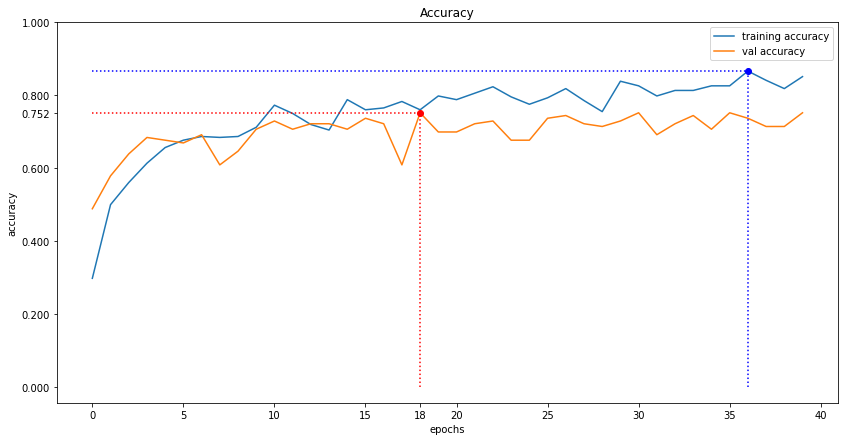

In [94]:
#256 512 256 F d0.2
plot(history)

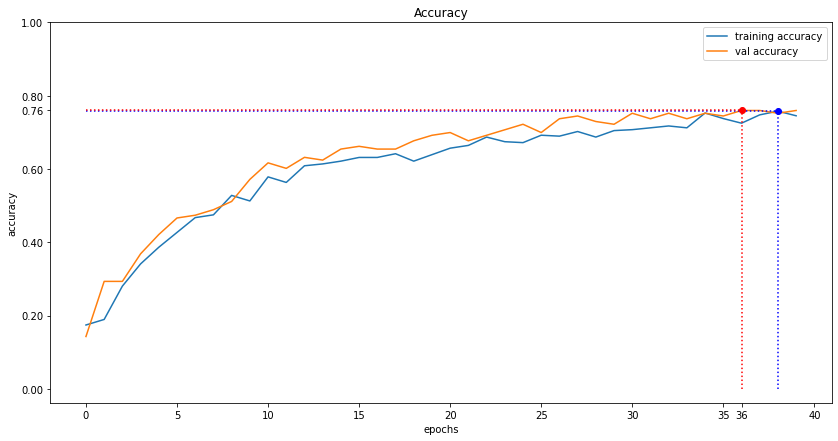

In [72]:
#256 D1024 sgd
plot(history)

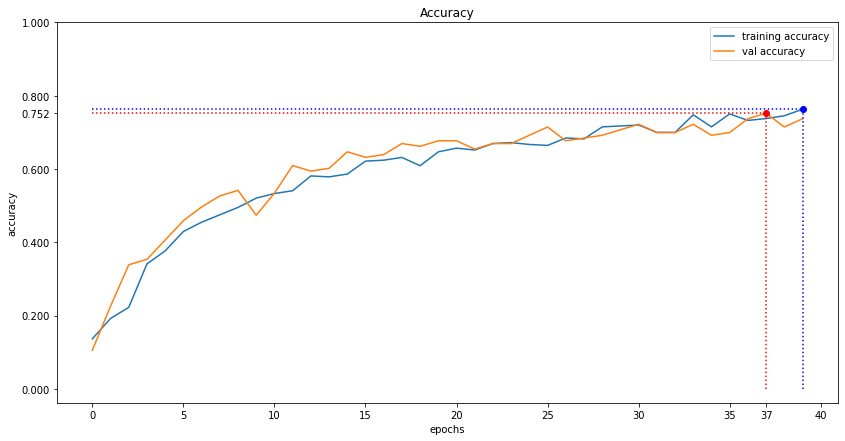

In [84]:
#256 D1024 D1024 sgd
plot(history)

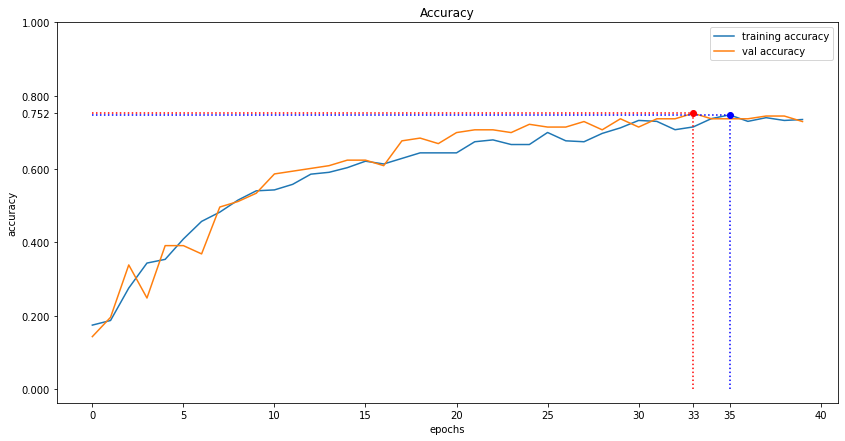

In [82]:
#256 D4096 sgd
plot(history)

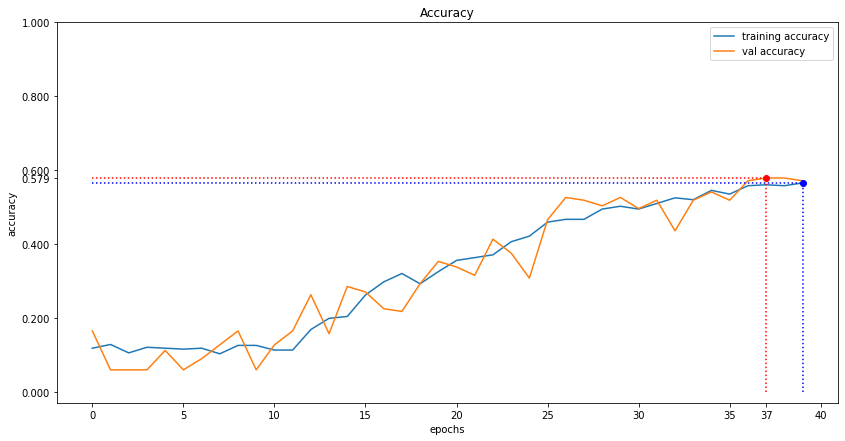

In [78]:
#256 512 256 D1024 sgd
plot(history)

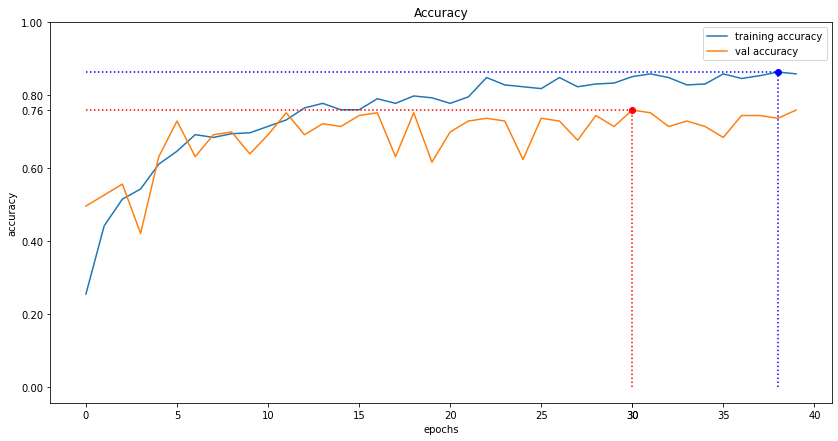

In [68]:
#256 512 256 b = 1
plot(history)

In [43]:
import matplotlib.pyplot as plt
def plot(history):
    val = [max(history.history['val_accuracy']),np.argmax(history.history['val_accuracy'])]
    train = [max(history.history['accuracy']),np.argmax(history.history['accuracy'])]

    x_ax = list(np.linspace(0, len(history.history['accuracy']), num=5))
    x_ax.append(val[1])
    y_ax = list(np.linspace(0, 1, num=3))
    y_ax.append(val[0])


    plt.figure(0)

    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')

    plt.plot(train[1], train[0], 'bo')
    plt.plot([train[1],train[1]],[0, train[0]],':b')
    plt.plot([0,train[1]],[train[0], train[0]],':b')

    plt.plot(val[1],val[0], 'ro')
    plt.plot([val[1],val[1]],[0, val[0]],':r')
    plt.plot([0,val[1]],[val[0], val[0]],':r')

    plt.gcf().set_size_inches(14,7)
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.xticks(x_ax)
    plt.ylabel('accuracy')
    plt.yticks(y_ax)
    plt.legend()

In [42]:
train = [max(history.history['val_accuracy']),np.argmax(history.history['val_accuracy'])]
print(train)

[0.7593985199928284, 24]


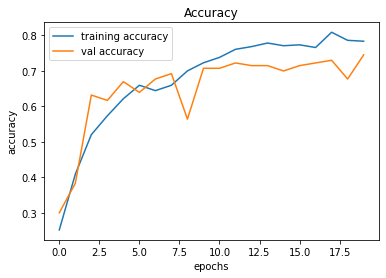

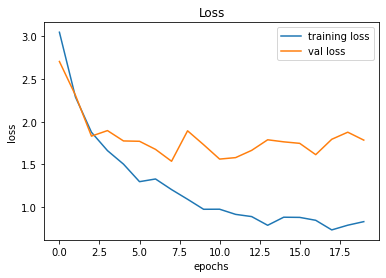

In [30]:
import matplotlib.pyplot as plt
# 256 512 256 b = 5
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

256 512 256 val_accuracy: 0.8109
new 256 512 256 val_accuracy: .8649 or .9054
new valacc = .8908


In [63]:
X_train.shape

(384, 5, 48)